In [300]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from time import time

from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.lda import LDA

In [301]:
Xdf_raw = pd.read_csv("../IndoorFingerprint.csv").drop("Y", axis=1)
Ydf_raw = pd.read_csv("../IndoorFingerprint.csv").drop("X", axis=1)

In [302]:
atribute_numbers = Xdf_raw.shape[1]-1

In [303]:
# Se normalizan los datos para ambos
scaler = preprocessing.StandardScaler()
Xdf_raw.iloc[:, 1:atribute_numbers+1] = scaler.fit_transform(Xdf_raw.iloc[:, 1:atribute_numbers+1])
X_std = Xdf_raw.iloc[:, 1:atribute_numbers+1]
y = Xdf_raw.iloc[:,0]
print(scaler.scale_)
print(scaler.mean_)
scale = np.array(scaler.scale_)
mean = np.array(scaler.mean_)

mclasses= sorted(list(set(y)))
N = len(mclasses)

np.savetxt('scale.txt',[scale] , delimiter=' ', fmt='%.8f')
np.savetxt('mean.txt',[mean] , delimiter=' ', fmt='%.8f')

[ 61.11291991  38.74022764   7.76283808  43.53712215   9.22950797
   7.71450031   7.29606292   9.50793818]
[-71.15212121 -85.02590909 -89.73454545 -77.81075758 -90.21909091
 -80.1330303  -89.09151515 -89.19545455]


In [304]:
import seaborn as sns
sklearn_pca = PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_std)
cmap = plt.cm.get_cmap('Paired') # Paleta de color cualitativo para diferenciar cada clase
mcolors = [cmap(i) for i in np.linspace(0,1,N)]

components = sklearn_pca.components_
print(components)

rssi = np.array([[-66,-92,-84,-84,-92,-93,-98,-96]])
response = scaler.transform(rssi);
print(response)

np.savetxt('PCA.txt',components , delimiter=' ', fmt='%.8f')

plt.figure(figsize=(10, 8))

for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y==lab, 0], Xred_pca[y==lab, 1], label=lab, c=col, edgecolors='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='best', fancybox=True)
sns.set()


[[ 0.41346757  0.28146245 -0.49234148  0.17315241  0.22374539 -0.32755642
   0.36638773  0.43109906]
 [-0.28940772 -0.46623485 -0.18954393  0.28352839  0.16628262 -0.41032293
  -0.53831318  0.31105801]]
[[ 0.08430494 -0.18002194  0.73871764 -0.14216012 -0.19295818 -1.66789412
  -1.22099891 -0.71566993]]


c:\users\felip\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


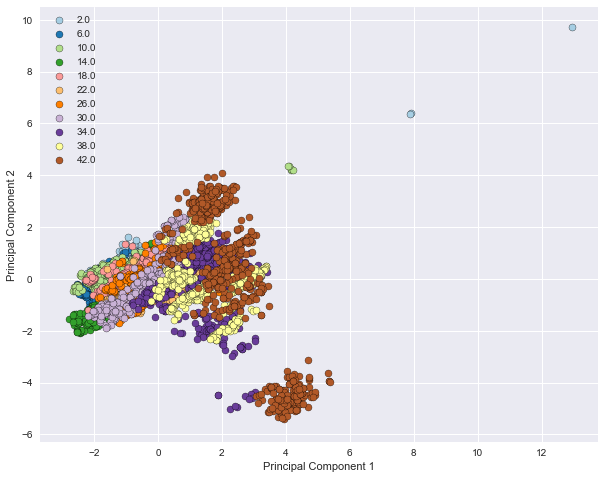

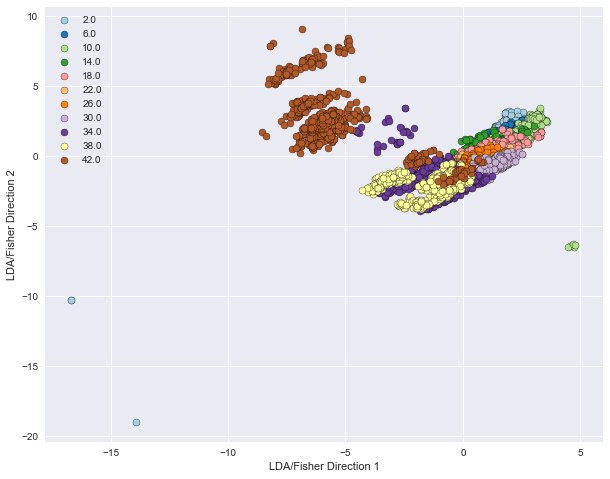

In [305]:
sklearn_lda = LDA(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_std,y)
cmap = plt.cm.get_cmap('Paired') # Paleta de color cualitativo para diferenciar cada clase
plt.figure(figsize=(10, 8))

for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y==lab, 0], Xred_lda[y==lab, 1], label=lab, c=col, edgecolors='black')

plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='best', fancybox=True)

plt.show()